 <img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2017

<font size=1>Parte de este material es autoría del profesor Cristian Guarnizo de la Universidad Tecnológica de Pereira. A él damos créditos.</font>

En este notebook se aborda el tema de lógica difusa utilizando códigos ejecutables en Python:
<ul>
    <li>Conjuntos difusos.</li>
    <li>Funciones de pertenencia.</li>
     <li>Variable difusa.</li>
    <li>Fusificación (emborrosamiento).</li>
    <li>Base de reglas.</li>
    <li>Operadores difusos.</li>
    <li>Desfusificación.</li>
</ul>

<hr>
## Módulo 3_1: Logica Difusa
<img src="res/fuzzy/fuzzy.gif" width="400px">

<hr>
<font size=3>
En términos reducidos, la lógica borrosa es un tipo de lógica que permite valores imprecisos (intermedios) para poder definir evaluaciones convencionales entre sí/no, verdadero/falso, negro/blanco, etc.</font>

<br>
<center><font size=5 color="blue">"El poder de la lógica difusa radica en que se puede analizar un sistema utilizando variables lingüísticas" [5].</font></center>


<hr>
## Conjunto Booleano
En el algebra de Boole(George Boole) las variables toman valores falso/verdadero $(0,1)$.  Definamos un conjunto $A=[3,5]$ y $x \in \left \{ 0,7 \right \}$.  Los valores de x que pertenecen a A reciben valor verdadero (1). 

<img src="res/fuzzy/boolean_set.png" width=400>

Por ejemplo, para el caso de la variable temperatura, si quisiermos definir los valores temperatura baja, media y alta, utilizando lógica booleana, tendríamos:

<img src="res/fuzzy/boolean_temperature.png" width=400>

En el ejemplo anterior, un elemento (valor de temperatura) tiene un grado de pertenencia a un conjunto o grupo, entonces, <font color="red">¿A los 15 grados Celsius la temperatura es baja y repentinamente a los 16 es media?</font>

In [5]:
"""
Implements a Boolean set.

Arguments:
x_domain -- domain of variable x (array)
x_set -- tuple of values that represents the set within domain of x

Returns:
parameters -- boolean (True, False) list of values inside x_set
"""
import numpy as np

def boolean_set(x_domain, x_set):
    val = np.logical_and(x_domain >= x_set[0], x_domain <= x_set[1])
    return val

Grafiquemos algunos conjuntos Booleanos para una variable $x$ en el rango 0, 10

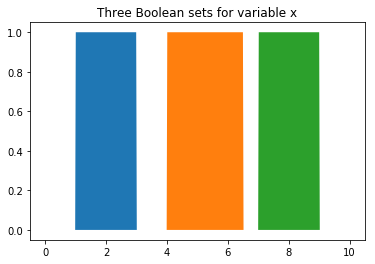

In [6]:
import matplotlib.pyplot as plt

limit1 = 0
limit2 = 10
domain = np.linspace(limit1, limit2, 500)

set1 = (1,3)
bool_set_1 = boolean_set(domain,set1)

set2 = (4,6.5)
bool_set_2 = boolean_set(domain,set2)

set3 = (7,9)
bool_set_3 = boolean_set(domain,set3)

plt.fill(domain, bool_set_1)
plt.fill(domain, bool_set_2)
plt.fill(domain, bool_set_3)


plt.title("Three Boolean sets for variable x")
plt.show()

<hr>
## <font color="red"> Trabajemos!</font>
Implemente los conjuntos Booleanos que definen la mayoría de edad de una persona en Colombia.

<hr>
## Conjunto difuso ($\mu$)

En un conjunto difuso, los grados de pertenencia son continuos y no binarios (falso, verdadero), de forma tal que una variable puede pertenecer en distinto grado a varios conjuntos. 

En el siguiente ejemplo definimos tres conjuntos difusos $\mu_{baja}, \mu_{media}$ y $\mu_{alta}$, para la variable temperatura, en el rango [0, 45] grados centigrados.

<img src="res/fuzzy/fuzzy_set.png">

En el caso anterior, <font color="red">¿un valor de temperatura igual a 17 grados será baja o media?</font>

<hr>
## Funciones de pertenencia

Un conjunto difuso $\mu$ se define mediante una función de pertenencia. Dicha función define la forma en que se distribuye la pertenencia de una variable $x$ a un conjunto $S$ cambia. A continuación, algunas funciones de pertenencia y su definición algebraica:

<img src="res/fuzzy/functions.png">

Dependiendo de la naturaleza de la variable que se estudia, se define el número de conjuntos difusos y la función de pertenencia de cada uno.

<hr>
## <font color="red">Trabajemos!</font>
Defina los conjuntos difusos para la variable edad, respecto a las categorías infante, adolescente, adulto, cenil.

<hr>
## Variable difusa ($x_{fuzzy}$)

Una variable difusa está conformada por los valores de pertencia de dicha variable respecto a cada conjunto. Entonces, la variable temperatura que estudiamos anteriormente se define como:

<br>
<center><font size=5>$t_{fuzzy}=[\mu_{baja}(t), \mu_{media}(t), \mu_{alta}(t)]$</font></center>

<img src="res/fuzzy/fuzzy_set.png">


<hr>
## Fusificación

Esta operación consiste en transformar una variable normal (crisp) en una variable fuzzy. Para ello, se aplica calcula por cada conjunto difuso, el grado de pertenencia de dicha variable.  Por ejemplo para el caso de la temperatura, supongamos el caso $t=10$, entonces:

<br>
<font size=4>
<ul>
    <li>$\mu_{baja}(t) = 1$</li>
    <li>$\mu_{media}(t) = 0$</li>
    <li>$\mu_{alta}(t) = 0$</li>
</ul>

<center>Por lo tanto <font color="red">$t_{fuzzy}=[1,0,0]$</font></center>
</font>

In [7]:
"""
Implements a membership function.

Arguments:
x -- crisp variable
membership_function -- string with the name of membership function: "trapezoid", "triangular"
parameters -- dictionary of parameters for membership function

Returns:
m_x -- float membership of x with respect to memebership_function
"""
import numpy as np

def membership(x, membership_function, parameters):
    m_x = 0
    
    if(membership_function == "trapezoid"):
        a = float(parameters["a"])
        b = float(parameters["b"])
        c = float(parameters["c"])
        d = float(parameters["d"])
        
        if(x <= a or x >= d):
            m_x = 0
        elif(x >= a and x <= b):
            m_x = (x-a)/(b-a)
        elif(x > b and x < c):
            m_x = 1
        elif(x >= c and x < d):
            m_x = (d-x)/(d-c)
            
    
    elif(membership_function == "triangular"):
        a = float(parameters["a"])
        m = float(parameters["m"])
        b = float(parameters["b"])
        
        if(x <= a):
            m_x = 0
        elif(x > a and x <= m):
            m_x = (x-a)/(m-a)
        elif(x > m and x < b):
            m_x = (b-x)/(b-m)
        else:
            m_x = 0
    
    return m_x

## <font color="red">Trabajemos!</font>
Utilizando las funciones de pertenencia implementadas, fusificar la variable $temperatura=16.7 \in T$:

In [8]:
#Completar: aproximadamente 3 lineas de codigo
parameters_conjunto_baja = {"a":0, "b":0, "c":15, "d":20}

t = 16.7

#completar: aproximadamente 3 lineas de codigo
miu_baja = membership(t, "trapezoid", parameters_conjunto_baja)

#completar la lista de pertenencias
t_fuzzy = [miu_baja]

print "temperatura fuzzy: ", t_fuzzy

temperatura fuzzy:  [0.6600000000000001]


<hr>
### Obtengamos y visualicemos todo el conjunto fuzzy utilizando la función anterior

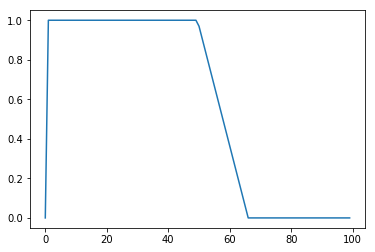

In [9]:
resolucion = 100
T = np.linspace(0, 30, resolucion)

#utilicemos comprehension de python para generar todo el vector del conjunto fuzzy
conjunto_baja = np.array([membership(t, "trapezoid", parameters_conjunto_baja) for t in T])

plt.plot(conjunto_baja)
plt.show()

<hr>
Creemos una función que permita generar el conjunto fuzzy de una variable X, dada la variable $X$, el tipo de conjunto fuzzy y sus parametros. <b>Esta función será de utilidad posteriormente.</b>

In [10]:
def generate_fuzzy_set(X, membership_function, parameters):
    fuzzy_set = np.array([membership(x, membership_function, parameters) for x in X])
    return fuzzy_set

<hr>
### Grafiquemos todos los conjuntos fuzzy de la variable $T$
Utilicemos para ello la funcion generate_fuzzy_set

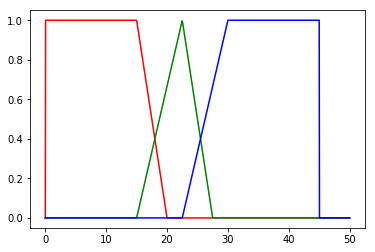

In [11]:
params_conjunto_baja = {"a":0, "b":0, "c":15, "d":20}
params_conjunto_media = {"a":15, "m":22.5, "b":27.5}
params_conjunto_alta = {"a":22.5, "b":30, "c":45, "d":45}

resolucion = 1000
T = np.linspace(0, 50, resolucion)

conjunto_baja = generate_fuzzy_set(T, "trapezoid", params_conjunto_baja)
conjunto_media = generate_fuzzy_set(T, "triangular", params_conjunto_media)
conjunto_alta = generate_fuzzy_set(T, "trapezoid", params_conjunto_alta)

plt.plot(T,conjunto_baja, 'r')
plt.plot(T,conjunto_media, 'g')
plt.plot(T,conjunto_alta, 'b')
plt.show()

## <font color="red">Trabajemos!</font>
Implementar una función generica fusificacion que calcule automáticamente la fusificación de una variable x respecto a n conjuntos difusos:

In [12]:
"""
Implements a fuzzify function.

Arguments:
x -- crisp variable
fuzzy_sets -- dictionary with next form: {"set_name":(membership_function, parameters)}
    membership_function: string with the name of membership_function: "trapezoid", "triangular"
    parameters -- dictionary of parameters for membership function

Returns:
f_x -- list of membership values of x with respect to each set in fuzzy_sets
"""
def fuzzify(x, fuzzy_sets):
    ##CODE HERE
    f_x = [] #lista de valores de pertenencia por cada conjunto difuso
    
    keys = fuzzy_sets.keys()
    
    for k in keys:
        #CODE HERE: utilizar la funcion membership(x, membership_function, parameters)
        #m = membership(x, fuzzy_sets[k]..., fuzzy_sets[k]...)
        m = None
        f_x.append(m)
    
    return f_x

Utilicemos la función genérica para fusificar la variable t=16.7 $\in T$

In [47]:
params_conjunto_baja = {"a":0, "b":0, "c":15, "d":20}
params_conjunto_media = {"a":15, "m":22.5, "b":27.5}
params_conjunto_alta = {"a":22.5, "b":30, "c":45, "d":45}

funcion_baja = "trapezoid"
funcion_media = "triangular"
funcion_alta = "trapezoid"

key_baja = "baja"
key_media = "media"
key_alta = "alta"

t = 16.7
fuzzy_sets = {key_baja:(funcion_baja, params_conjunto_baja), key_media:(funcion_media, params_conjunto_media), key_alta:(funcion_alta, params_conjunto_alta)}

print(fuzzify(t, fuzzy_sets))

[0.6600000000000001, 0.22666666666666657, 0]


<b>Salida esperada</b>: [0.6600000000000001, 0.22666666666666657, 0]

<hr>
## Base de reglas

Estas reglas especifican el conocimiento del <font color="red" size=3>experto humano</font> en forma de condicionales que utilizan los nombres de los conjuntos difusos que tienen las variables difusas. Es decir, estas reglas expresan la relación entre los valores lingüísticos de la entrada con respecto a la salida. 

Por ejemplo, utilizando este tipo de reglas y las variables difusas, podemos realizar preguntas en lenguaje natural, tales como: ¿Está la temperatura alta?

Las reglas se construyen con instrucciones IF-THEN:

<br>
<center><font color="blue" size=5>IF $x_1$ es "bajo" and $x_2$ es "medio" entonces $y$ es medio</font></center>

Estas reglas requieres de operadores AND y OR especificamente diseñados para la lógica difusa.

<hr>
## Operadores

<img src="res/fuzzy/operators.png">

Dependiendo de la definición de las reglas, los antecedentes se pueden combinar con los operadores AND y OR, o cambiar su valor con la negación NOT.


<hr>
## Resolución de reglas y obtención de la salida

La resolución de reglas se refiere a como se interpreta la regla desde la lógica difusa. El proceso es el siguiente:

<ol>
    <li>Seleccionar la pertenencia a la cuál hacen referencia los operandos de las reglas:</li>
    <br>
    <center><font color="blue" size=5>If $\mu_{bajo}(x_1)$ AND $\mu_{medio}(x_2)$ entonces $Y_{bajo}$</font></center>
    
    <li>Resolver los operadores difusos del antecendente:</li>
    <center><font color="blue" size=5>$K_{r1}$ = AND($\mu_{bajo}(x_1)$, $\mu_{medio}(x_2))$</font></center>
    
    <li>Agrupar reglas con el mismo consecuente y aplicar operador OR:</li>
    
    <center><font color="red" size=4> $A_{bajo} = $OR($K_{r1} \in y_{bajo}$, $K_{r2} \in y_{bajo}$,..., $K_{rn}\in y_{bajo}$)</font></center>
    <center><font color="red" size=4> $A_{medio} = $OR($K_{r1} \in y_{medio}$, $K_{r2} \in y_{medio}$,..., $K_{rn}\in y_{medio}$)</font></center>
    <center><font color="red" size=4> $A_{alto} = $OR($K_{r1} \in y_{alto}$, $K_{r2} \in y_{alto}$,..., $K_{rn}\in y_{alto}$)</font></center>
    
    <li>Resolver el consecuente de la regla mediante implicación (MIN), para cada conjunto de la salida: </li>
    <center><font color="blue" size=5> $S_{bajo}$ = MIN($A_{bajo}$, $\mu_{bajo}(y))$</font></center>
    <center><font color="blue" size=5> $S_{medio}$ = MIN($A_{medio}$, $\mu_{medio}(y))$</font></center>
    <center><font color="blue" size=5> $S_{alto}$ = MIN($A_{alto}$, $\mu_{alto}(y))$</font></center>
    
    <li>Obtener el área de respuesta aplicando mediante AGREGACION utilizando el operador MAX entre todos los resultados de las reglas ya implicadas.</li>
     <center><font color="blue" size=5> $Y_{fuzzy}$ = $MAX(S_{bajo}, S_{medio}, S_{alto} )$</font></center>
    
    <li>Obtener el valor final de la regla mediante DESFUSIFICACION.</li>
    <center><font color="blue" size=5> $salida$ = $desfusificacion(Y_{fuzzy})$</font></center>
</ol>

<hr>
## 2. Resolver operador difuso

In [61]:
"""
Implements Zadeh's Fuzzy Operators.

Arguments:
operator -- string with name of operator: "AND", "OR", "NOT"
parameters -- dictionary with parameters of operator

Returns:
k -- operators value
"""

def fuzzy_operator(operator, parameters):
    k = 0
    if(operator == "AND"):
        a = parameters["a"]
        b = parameters["b"]
        k = min(a, b)
    elif(operator == "OR"):
        a = parameters["a"]
        b = parameters["b"]
        k = max(a, b)
    elif(operator == "NOT"):
        a = parameters["a"]
        k = 1 - a
    else:
        print("Invalid operator.")
    
    return k

In [67]:
parameters = {"a": 0.2, "b": 0.8}
print fuzzy_operator("OR", parameters)

0.8


<hr>
## 3. Agrupar reglas (mismo consecuente)

Reglas que tengan un mismo consecuente, son agrupas como un solo valor utilizando el operador OR == MAX (ZADEH), debido a que por lógica tradicional si dos antecedentes conducen a un mismo consecuente, es lo mismo que un disyunción entre dichos antecedentes, es decir:

<br>
<center>si $a < b$ entonces $c$ y si $a < f$ entonces $c$ </center>

entonces, es lo mismo que:
<br>

<center>si $a < b$ OR $a < f$ entonces $c$</center>

In [118]:
"""
Implements common consecuent grouping.

Arguments:
rules -- list of values from resolved antecedents of rules with same consecuent

Returns:
val -- max from rules
"""

def fuzzy_group(rules):
    val = np.max(rules)
    return val

In [119]:
A1 = 0.2
A2 = 0.1
A3 = 0.6

rules = [A1,A2,A3]

print fuzzy_group(rules)

0.6


<hr>
## 4. Resolver consecuente mediante implicación

Lo primero que debemos hacer es generar el conjunto de salida al que hace referencia la regla o el conjunto de reglas ya agrupada.

Para ello utilizamos la funcion <b>generate_fuzzy_set</b> que construimos anteriormente.

supongamos un conjunto fuzzy $\mu_{A}(Y)$ de una variable $Y \in [0, 100]$ de tipo triangular con parámetros $a = 10$, $m = 20$ y $c = 30$, realicemos una implicación sobre dicho conjunto con valor de $r = 0.4$

In [120]:
resolucion = 100
Y = np.linspace(0,100,resolucion)
params_set_A = {"a":10, "m":20, "b":30}

fuzzy_set_A = generate_fuzzy_set(Y, "triangular", params_set_A)

In [139]:
"""
Implements fuzzy implication (MIN).

Arguments:
r -- scalar from rules solving and grouping.
fuzzy_set -- A fuzzy set (array of values).

Returns:
s -- implication result. An array of numeric values.
"""

def fuzzy_implication(r, fuzzy_set):
    val = np.minimum(r, fuzzy_set)
    return val

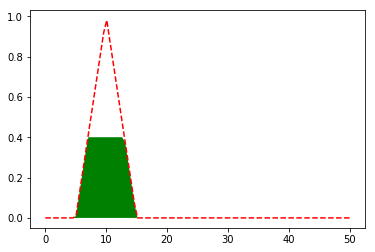

In [140]:
r = 0.4
implication_set = fuzzy_implication(r, fuzzy_set_A)
plt.plot(Y, fuzzy_set_A, 'r--')
plt.fill(Y, implication_set, 'g')
plt.show()

<hr>
Supongamos que tenemos tres conjuntos $A$ de tipo trapezoidal, $B$ de tipo triangular y $C$ de tipo triangular para la variable de salida $Y \in [0, 50]$, y que hemos tenemos los valores de los antecedentes de tres reglas que hacen referencia a cada conjunto asi: $r_A, r_B, r_C$.

In [141]:
resolucion = 100
Y = np.linspace(0,50,resolucion)

params_set_A = {"a":0, "b":10, "c":15, "d":20}
params_set_B = {"a":10, "m":20, "b":30}
params_set_C = {"a":25, "m":30, "b":45}

Y_A = generate_fuzzy_set(Y, "trapezoid", params_set_A)
Y_B = generate_fuzzy_set(Y, "triangular", params_set_B)
Y_C = generate_fuzzy_set(Y, "triangular", params_set_C)

#1. apliquemos implicacion
r_A = 0.2
r_B = 0.5
r_C = 0.7

A_implicated = fuzzy_implication(r_A, Y_A)
B_implicated = fuzzy_implication(r_B, Y_B)
C_implicated = fuzzy_implication(r_C, Y_C)

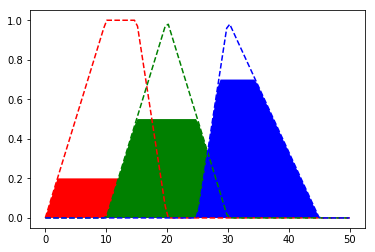

In [142]:
plt.plot(Y, Y_A, 'r--')
plt.plot(Y, Y_B, 'g--')
plt.plot(Y, Y_C, 'b--')
plt.fill(Y, A_implicated, 'r')
plt.fill(Y, B_implicated, 'g')
plt.fill(Y, C_implicated, 'b')
plt.show()

<hr>
## 5. Obtener el área de respuesta aplicando mediante AGREGACION utilizando el operador MAX entre todos los resultados de las reglas ya implicadas

In [167]:
"""
Implements Aggregation fuzzy operator using MAX.

Arguments:
fuzzy_sets -- A list with fuzzy_sets of output variable. All sets must have same dimension.

Returns:
val -- Aggregation result. An array of values.
"""
def fuzzy_aggregation(fuzzy_sets):
    val = np.zeros([fuzzy_sets[0].shape[0]])
    
    for s in fuzzy_sets:
        val = np.maximum(val, s)
        
    return val

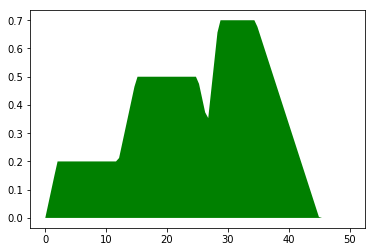

In [149]:
agg_set = fuzzy_aggregation([A_implicated, B_implicated, C_implicated])
plt.fill(Y, agg_set, 'g')
plt.show()

<hr>
## 6. Obtener el valor final de la regla mediante DESFUSIFICACION

Para ello podemos aplicar diferentes métodos. El más conocido es el del CENTROIDE o centro de área, definido como:

## <center>$y = \frac{\int_{i \in Y}{i \mu_{aggregated}(i)) di}}{\int_{i \in Y}{\mu_{aggregated}(i)) di}}$</center>

<br>
Otro método popular es el del BISECTOR definido como: "el valor que separa el área bajo la curva en dos sub-áreas iguales":

## <center>$y \mid \int_{i \in (-\infty,y )\in Y}{i \mu_{aggregated}(i)) di} \approx \int_{i \in [y, \infty) \in Y}{i \mu_{aggregated}(i)) di}$</center>

Implemetemos el método del centroide y apliquemos el mismo sobre el resultado anterior:

In [180]:
"""
Implements defuzzification (centroid, bisector).

Arguments:
Y -- array with range of output variable Y
fuzzy_set_output -- A fuzzy_set of output variable.
method -- string with name of deffuzification method. can be "centroid", "bisector"

Returns:
val -- scalar value of crisp output variable.
"""
def fuzzy_defuzzy(Y, fuzzy_set_output, method="centroid"):
   
    if(method == "centroid"):
        val = np.sum(Y * fuzzy_set_output) /  np.sum(fuzzy_set_output)
    elif(method == "bisector"):
        val = None
    
    return val

('salida del sistema: ', 25.03236833717073)


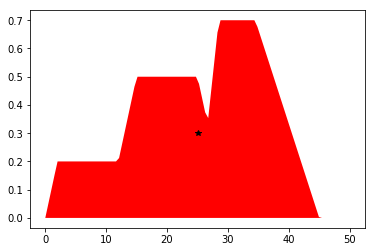

In [181]:
output = fuzzy_defuzzy(Y, agg_set, "centroid")
print("salida del sistema: ", output)

agg_set = fuzzy_aggregation([A_implicated, B_implicated, C_implicated])
plt.fill(Y, agg_set, 'r')
plt.plot(output, 0.3, 'k*')
plt.show()

<hr>
# Taller en clase

## Recordermos! Hemos implementado las siguientes funciones:
<ul>
<li>generate_fuzzy_set</li>
<li>fuzzify</li>
<li>fuzzy_operator</li>
<li>fuzzy_group</li>
<li>fuzzy_implication</li>
<li>fuzzy_aggregation</li>
<li>fuzzy_defuzzy</li>
</ul>

In [13]:
??generate_fuzzy_set

<hr>
### <font color="blue">1. Implementemos el siguiente ejemplo y verifiquemos si nuestra implementación arroja un resultado similar:</font>
<img src="res/fuzzy/taller_fuzzy.png" width=700>

<hr>
### <font color="blue">2. Analicemos el siguiente problema:</font>
La alcaldía de Medellin está interesada en desarrollar una solución computacional que permita determinar en "tiempo real" el nivel de contaminación en el valle de aburrá. Para ello contrata a un grupo de expertos en inteligencia artificial para desarrollar un modelo computacional para este propósito. Entre las tareas del grupo se encuentran:
<ol>
 <li>Estudiar las variables relacionadas con el nivel de contaminación.</li>
 <li>Identificar sensores existententes (SIATA) y nuevos para la medición de dichas variables.</li>
 <li>Caracterizar el comportamiento de dichos sensores respecto al nivel de contaminación.</li>
 <li>Plantear un modelo computacional que permita determinar el nivel de contaminación del valle de aburrá que utilice los sensores previamente caracterizados.</li>
</ol>

Los expertos deciden utilizar lógica borrosa (fuzzy logic) para construir dicho modelo o solución. 

Abarquemos los puntos definidos anteriormente desde una perspectiva de lógica borrosa y generemos una versión <b>DEMO</b> de dicho sistema para presentar a los directivos de la alcaldía, utilizando las implementaciones realizadas en clase.